# Packages

In [12]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import os

# Functions and constants

In [13]:
# run rh_all_days.py and rh_extreme_days.py by submitting jobs in GADI on the the terminal to get rh_all_days.nc and rh_extreme_days.nc

# Read data

In [14]:
# Load datasets for all days and extreme days for 20 stations
all_days_path = 'rh_all_days.nc'
extreme_days_path = 'rh_extreme_days.nc'

all_days_station = xr.open_dataset(all_days_path)
extreme_days_station = xr.open_dataset(extreme_days_path)

# Analysis

In [15]:
# Compute the average across all stations for all days and extreme days
all_days_average = all_days_station.mean(dim='station')
extreme_days_average = extreme_days_station

# Calculate the anomaly as the difference between extreme and all days averages
anomaly_r = extreme_days_average - all_days_average

# Extract the 'r' variable (Relative Humidity) for plotting
anomaly_r_dataarray = anomaly_r['r']

# Plots

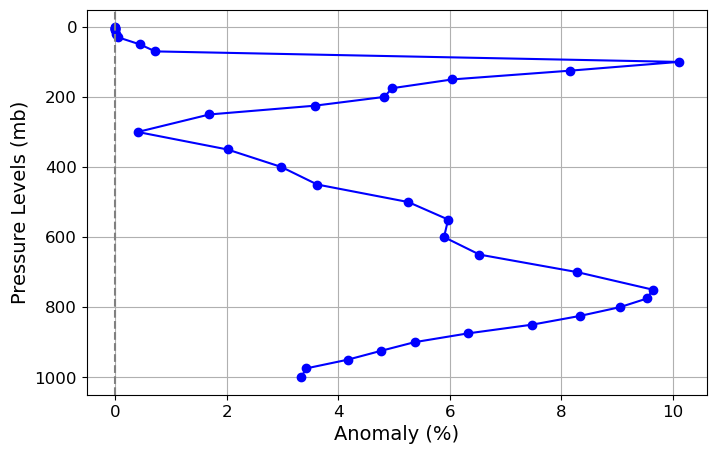

In [16]:
# Plot the anomaly 'r' values against the vertical levels
plt.figure(figsize=(8, 5))
plt.plot(anomaly_r_dataarray, anomaly_r_dataarray['level'], marker='o', color='blue')

# Invert the y-axis to show levels in increasing order
plt.gca().invert_yaxis()

# Add a vertical line at 0 anomaly for reference
plt.axvline(x=0, color='gray', linestyle='--')

# Label the axes and set the font size
plt.xlabel('Anomaly (%)', fontsize=14)
plt.ylabel('Pressure Levels (mb)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()